# Hadronic decays

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from alpaca import ALPcouplings, citations, branching_ratio, decay_width
from alpaca import alp_channels_decay_widths
from alpaca.decays.alp_decays.branching_ratios import BRsalp
plt.rcParams.update({'text.usetex':True})

We reproduce Figure (3) of <a href="#Ovchynnikov2025gpx">[1]</a>, which only includes ALP couplings to gluons.

$$\mathcal{L}=\frac{a}{f_a} \frac{g_s^2 \tilde{c}_{G}}{16\pi^2} G^a_{\mu\nu}\tilde{G}^{a,\mu\nu}$$

In [ ]:
fa = 1e3 #GeV
ma_range = np.linspace(0.1, 3, 200) #GeV, vector of ALP mass

## Obtain the coupling, with running and matching of the coupling

In [ ]:
coupl_cG = ALPcouplings({'cG': 1.0}, 4*np.pi*fa, basis='derivative_above').match_run(scale_out=10,basis='VA_below',integrator='scipy',match_tildecouplings=True)

Calculation of the decay width of each channel that is relevant for us

In [ ]:
agammagamma = decay_width('a -> gamma gamma', ma_range, coupl_cG, fa, integrator='scipy')
a3pi = decay_width('a -> pi pi pi', ma_range, coupl_cG, fa, integrator='scipy')
agammapipi = decay_width('a -> gamma pi pi', ma_range, coupl_cG, fa, integrator='scipy')
aetapipi = decay_width('a -> eta pi pi', ma_range, coupl_cG, fa, integrator='scipy')
aetappipi = decay_width('a -> eta_prime pi pi', ma_range, coupl_cG, fa, integrator='scipy')
a2w = decay_width('a -> omega omega', ma_range, coupl_cG, fa, integrator='scipy')
a2g = decay_width('a -> g g', ma_range, coupl_cG, fa, integrator='scipy')
ahadrons = decay_width('a -> hadrons', ma_range, coupl_cG, fa, integrator='scipy')

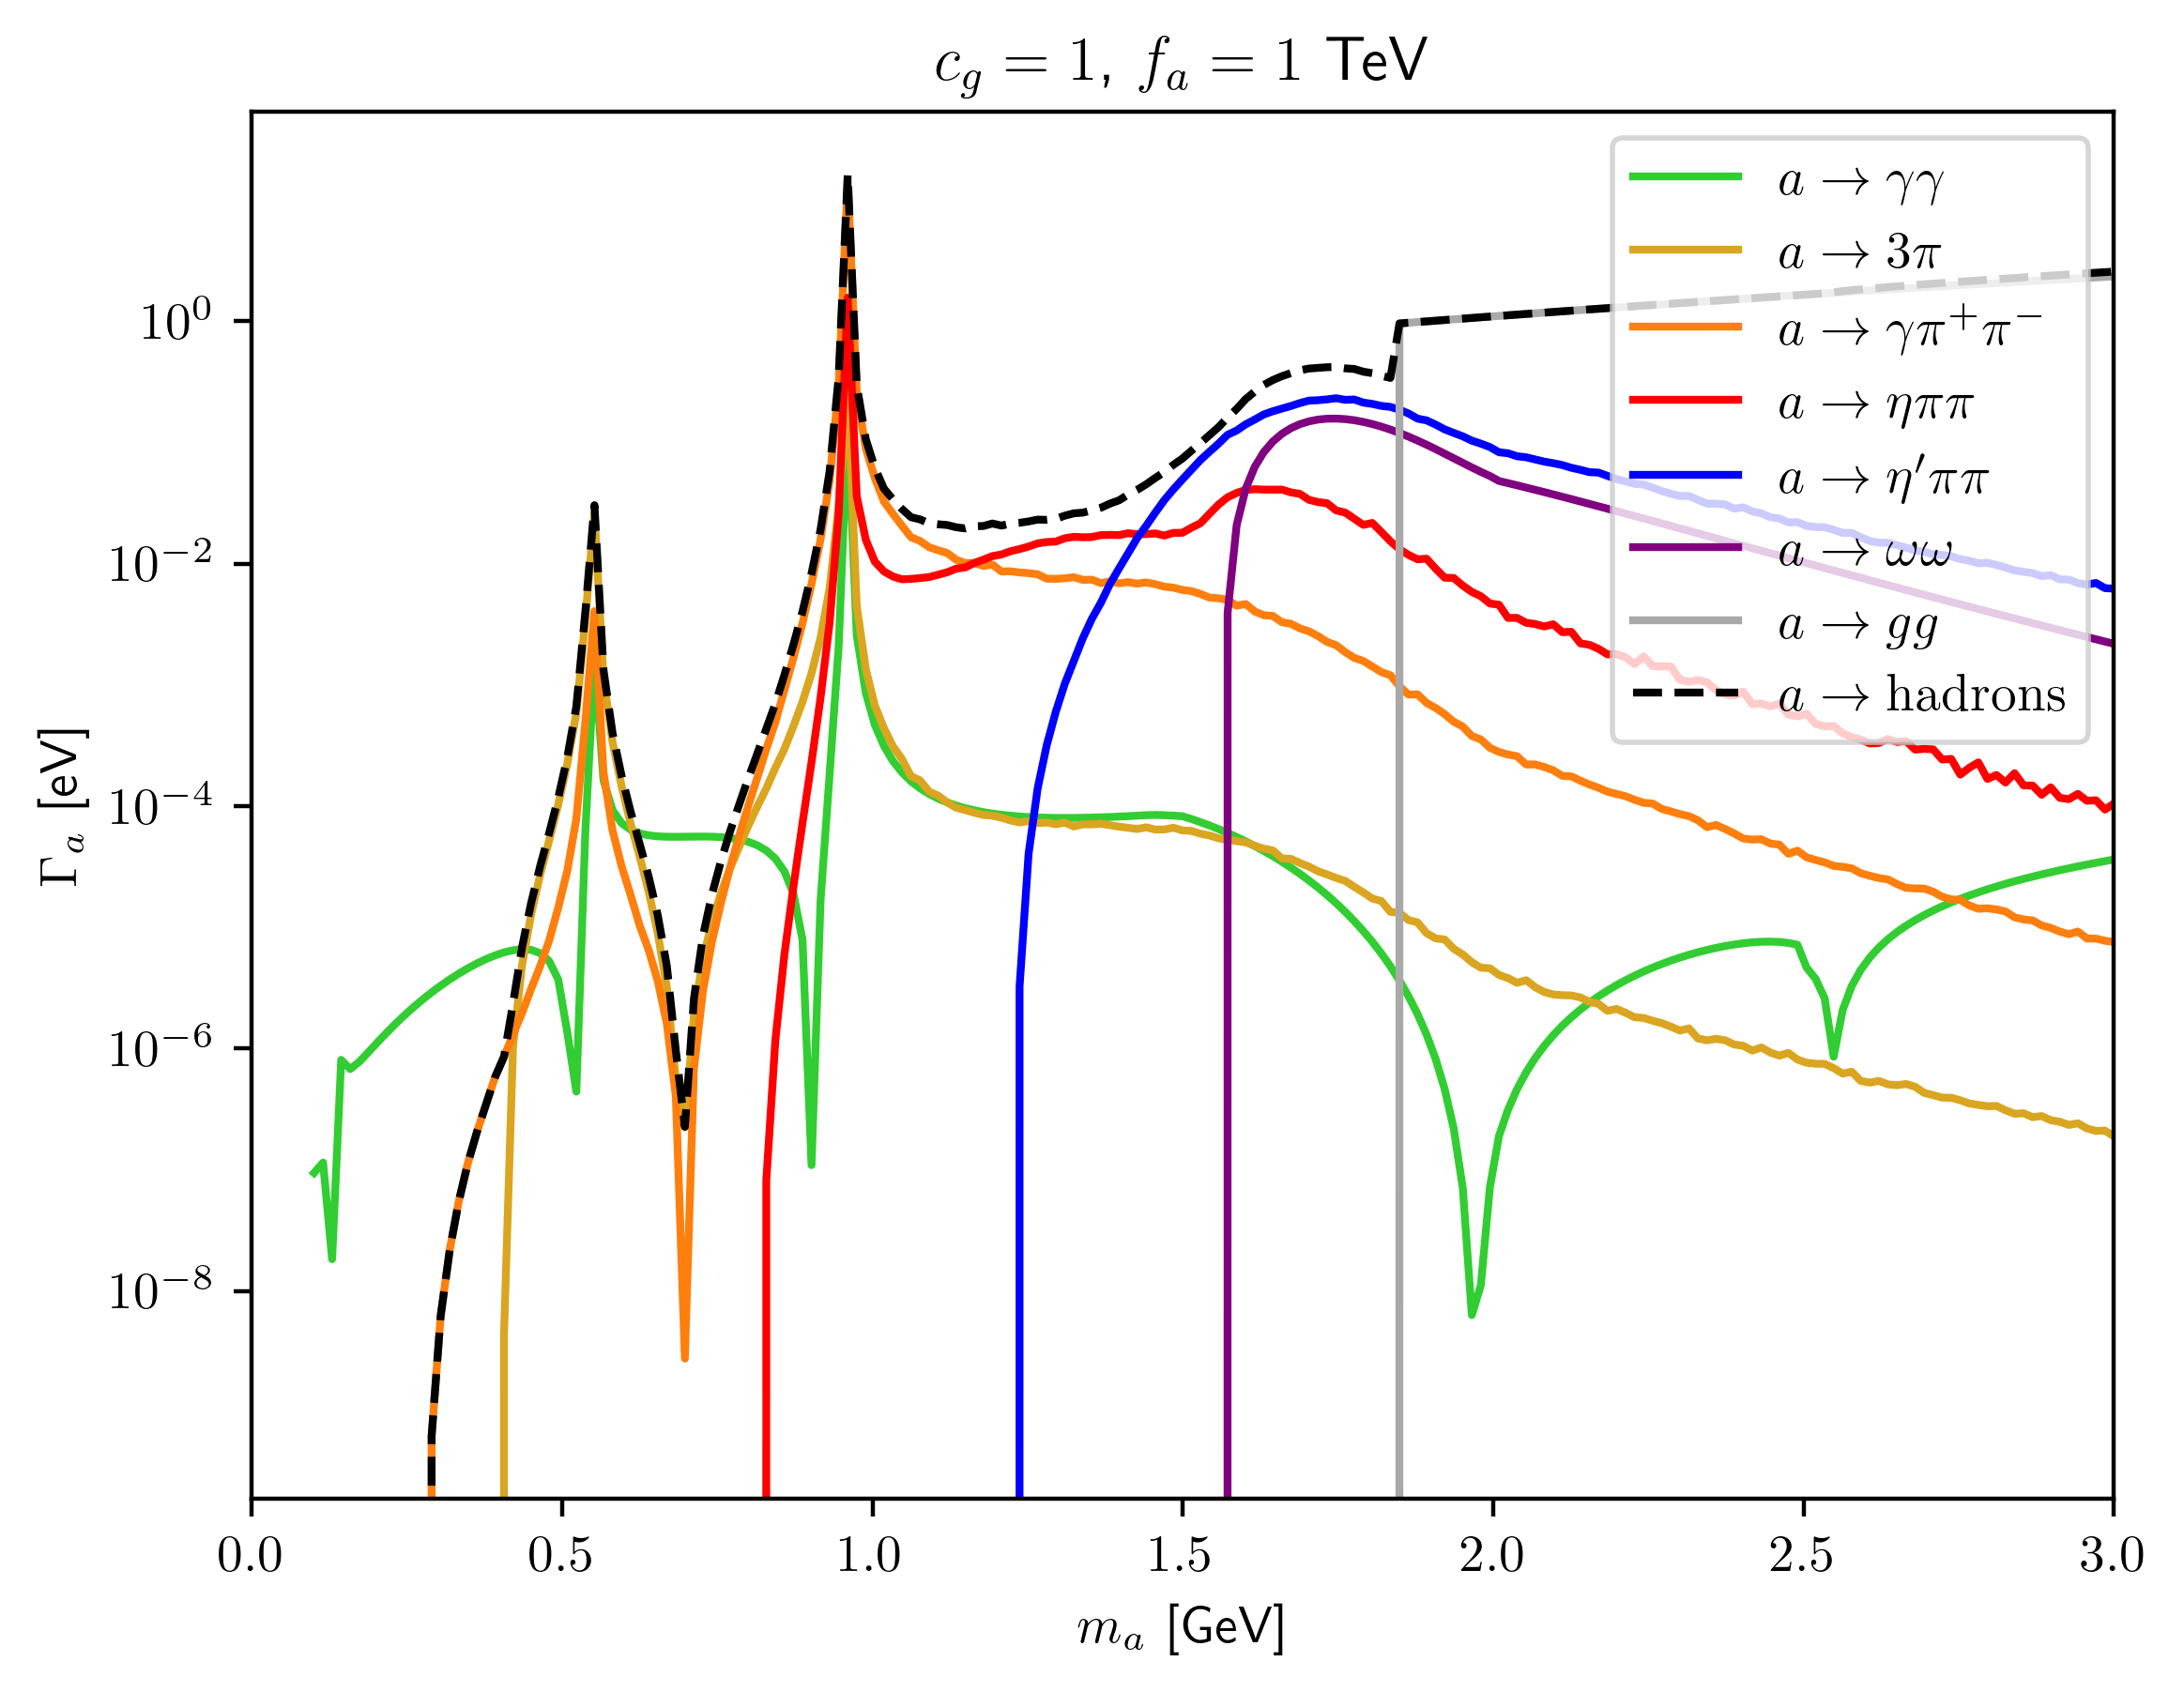

In [ ]:
plt.figure(dpi=400)

plt.semilogy(ma_range, 1e9*agammagamma, c='limegreen', label=r'$a\to\gamma\gamma$')
plt.semilogy(ma_range, 1e9*a3pi, c='goldenrod', label=r'$a\to3\pi$')
plt.semilogy(ma_range, 1e9*agammapipi, c='tab:orange', label=r'$a\to\gamma\pi^+\pi^-$')
plt.semilogy(ma_range, 1e9*aetapipi, c='red', label=r'$a\to\eta\pi\pi$')
plt.semilogy(ma_range, 1e9*aetappipi, c='blue', label=r"$a\to\eta'\pi\pi$")
plt.semilogy(ma_range, 1e9*a2w, c='purple', label=r'$a\to\omega\omega$')
plt.semilogy(ma_range, 1e9*a2g, c='darkgrey', label=r'$a\to gg$')
plt.semilogy(ma_range, 1e9*ahadrons, c='black', ls='dashed', label=r'$a\to \mathrm{hadrons}$')

plt.ylim(1e-10, 1e2)
plt.xlim(0, 3)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\Gamma_a$ [eV]')
plt.legend(loc='upper right')
plt.title(r'$c_G=1$, $f_a=1$ TeV')
#plt.savefig('dw_hadrons.png', dpi=400, bbox_inches='tight')
#plt.savefig('dw_hadrons.pdf', dpi=400, bbox_inches='tight')

## References

<a id="Ovchynnikov2025gpx">[1]</a>    
M. Ovchynnikov and A. Zaporozhchenko,    
*Advancing the phenomenology of GeV-scale axionlike particles*,    
[Phys. Rev. D **112** (2025) no.1, 015001](https>//dx.doi.org/10.1103/568p-d1ls)    
[arXiv:2501.04525 [hep-ph]](https://arxiv.org/abs/2501.04525).